# 신용카드 이상거래 예측하기

출처: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

신용카드 거래 내역을 사용하여 이상거래를 탐지하려고 한다.

그러나 신용카드 거래 중 0.1%만이 사기인 것으로 추정되기 때문에 높은 정확도를 요한다.

그러므로, 지도 학습을 이용하여 딥러닝을 통해 예측을 해본다.

In [1]:
import pandas as pd
import numpy as np
import keras

np.random.seed(2)

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


익명화로 되어있는 신용카드 거래가 포함된 데이트 세트이다.

# 데이터 전처리

In [4]:
# 액수 범위 정규화
from sklearn.preprocessing import StandardScaler
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'],axis=1) # 기존 금액 열 삭제
data = data.drop(['Time'],axis=1) # 시간 열 삭제

In [5]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class'] # 반응변수

In [6]:
# 지도 학습을 이용한 딥러닝
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [7]:
X_test.shape

(85443, 29)

In [8]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# 딥 신경망 만들기

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [10]:
model = Sequential([
    Dense(units=16, input_dim = 29,activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5), # 과적합 예방
    Dense(20,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                480       
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                500       
                                                                 
 dense_3 (Dense)             (None, 24)                504       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1,917
Trainable params: 1,917
Non-trainabl

1917개의 파라미터

# 학습 시키기

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
13291/13291 [==============================] - 24s 2ms/step - loss: 0.0091 - accuracy: 0.9985
Epoch 2/5
13291/13291 [==============================] - 20s 1ms/step - loss: 0.0039 - accuracy: 0.9993
Epoch 3/5
13291/13291 [==============================] - 18s 1ms/step - loss: 0.0035 - accuracy: 0.9993
Epoch 4/5
13291/13291 [==============================] - 18s 1ms/step - loss: 0.0034 - accuracy: 0.9994
Epoch 5/5
13291/13291 [==============================] - 19s 1ms/step - loss: 0.0033 - accuracy: 0.9994


In [13]:
# 데이터 세트 정확도
score = model.evaluate(X_test, y_test)
print(score)

2671/2671 [==============================] - 4s 1ms/step - loss: 0.0037 - accuracy: 0.9994
[0.003723593894392252, 0.9994031190872192]


# 혼동 행렬 만들기

In [14]:
#scikit-learn에서 가져온 코드

import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [15]:
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)

2671/2671 [==============================] - 3s 1ms/step


Confusion matrix, without normalization
[[85276    20]
 [   31   116]]


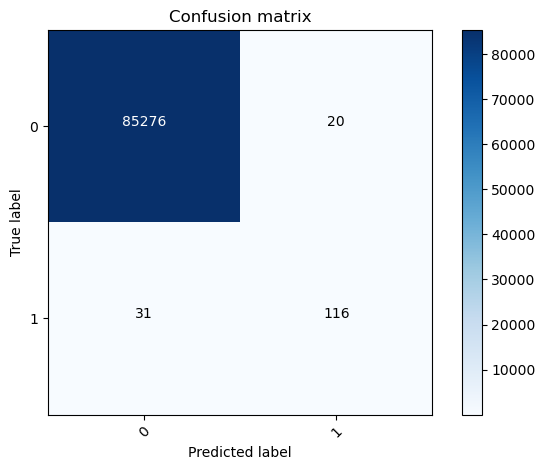

In [16]:
cnf_matrix = confusion_matrix(y_test, y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])

이상거래인데 아니라고 판단한 수가 30개다. (2종 오류)

전체 데이터 세트를 도식화한다.

8901/8901 [==============================] - 9s 1ms/step
Confusion matrix, without normalization
[[284247     68]
 [    95    397]]


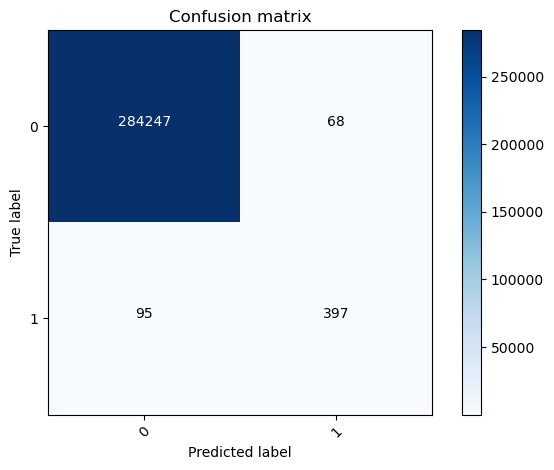

In [17]:
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

# 언더샘플링

In [18]:
fraud_indices = np.array(data[data.Class == 1].index) # 이상거래 인덱스
number_records_fraud = len(fraud_indices)
print(number_records_fraud)

492


In [19]:
normal_indices = data[data.Class == 0].index
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
random_normal_indices = np.array(random_normal_indices)
print(len(random_normal_indices))

492


In [20]:
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
print(len(under_sample_indices))

984


In [21]:
under_sample_data = data.iloc[under_sample_indices,:]
X_undersample = under_sample_data.iloc[:,under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:,under_sample_data.columns == 'Class']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_undersample,y_undersample, test_size=0.3)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                480       
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                500       
                                                                 
 dense_3 (Dense)             (None, 24)                504       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1,917
Trainable params: 1,917
Non-trainabl

기존과 같은 결과를 얻을 수 있다.

In [23]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
46/46 [==============================] - 1s 2ms/step - loss: 0.4025 - accuracy: 0.9041
Epoch 2/5
46/46 [==============================] - 0s 2ms/step - loss: 0.1960 - accuracy: 0.9259
Epoch 3/5
46/46 [==============================] - 0s 2ms/step - loss: 0.1502 - accuracy: 0.9346
Epoch 4/5
46/46 [==============================] - 0s 2ms/step - loss: 0.1511 - accuracy: 0.9360
Epoch 5/5
46/46 [==============================] - 0s 2ms/step - loss: 0.1481 - accuracy: 0.9390


전체 데이터가 아닌 언더샘플링된 적은 데이터이기 때문에 빠르게 작동한다.

10/10 [==============================] - 0s 1ms/step
Confusion matrix, without normalization
[[143   0]
 [ 12 141]]


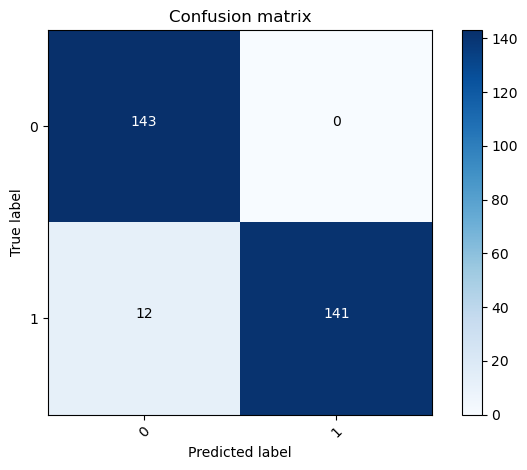

In [24]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

2종 오류가 16개 이다.

전체 데이터를 샘플링해본다.

8901/8901 [==============================] - 8s 943us/step
Confusion matrix, without normalization
[[283527    788]
 [    53    439]]


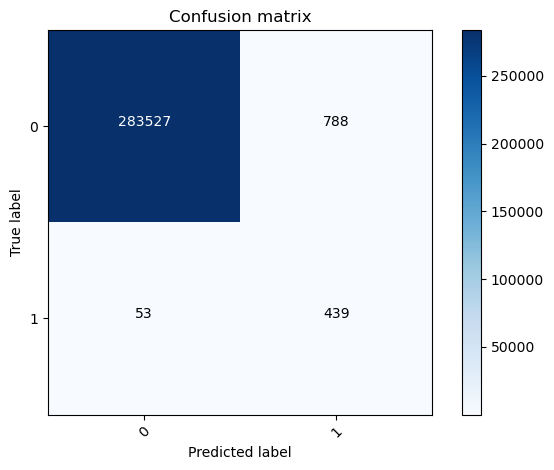

In [25]:
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

학습할 데이터를 많이 없앴기 때문에 2종 오류가 기존보다 증가한 것을 볼 수 있다.

오버 샘플링 기술 중 합성 소수 샘플링 기술을 이용해보자.

# SMOTE

In [26]:
from imblearn.over_sampling import SMOTE

In [27]:
X_resample, y_resample = SMOTE().fit_resample(X,y.values.ravel())
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size=0.3)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [28]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
26537/26537 [==============================] - 36s 1ms/step - loss: 0.0283 - accuracy: 0.9909
Epoch 2/5
26537/26537 [==============================] - 34s 1ms/step - loss: 0.0117 - accuracy: 0.9970
Epoch 3/5
26537/26537 [==============================] - 34s 1ms/step - loss: 0.0094 - accuracy: 0.9977
Epoch 4/5
26537/26537 [==============================] - 39s 1ms/step - loss: 0.0082 - accuracy: 0.9980
Epoch 5/5
26537/26537 [==============================] - 39s 1ms/step - loss: 0.0076 - accuracy: 0.9983


오버 샘플링 되어서 기존보다 학습이 느려진 것을 볼 수 있다.

5331/5331 [==============================] - 5s 956us/step
Confusion matrix, without normalization
[[84958   285]
 [   22 85324]]


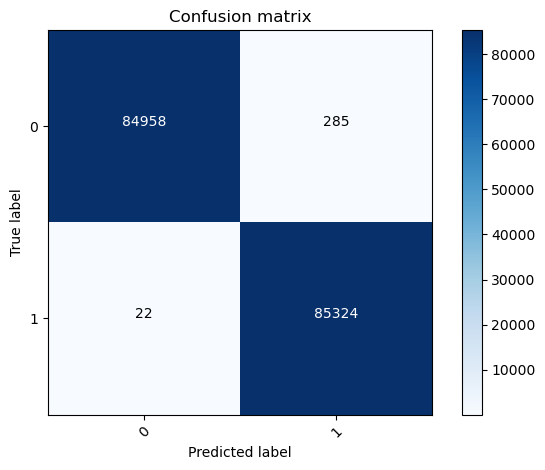

In [29]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

오직 22개만 2종 오류로서 감소한 것을 볼 수 있다.

8901/8901 [==============================] - 9s 1ms/step
Confusion matrix, without normalization
[[283455    860]
 [     1    491]]


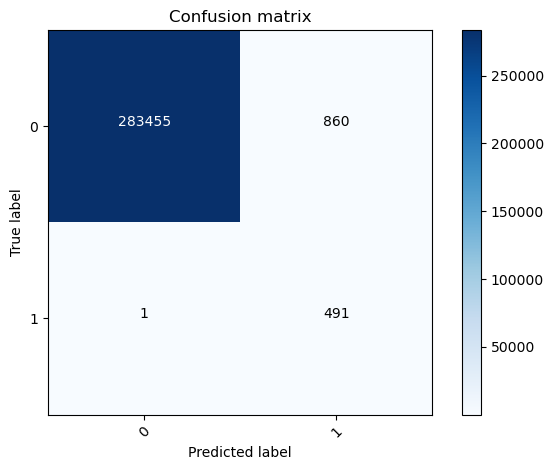

In [30]:
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

2종 오류가 1건 인것을 볼 수 있다.

통계검정에서 더 중요하다고 생각하는 1종 오류도 감소한 것을 관찰하였지만,

이상 거래를 잡는 것이 관건이기 때문에 2종 오류를 중점적으로 분석하였다.